
<h2 align="center">Multiple Linear Regression (this task = 50 points)</h2> 

Linear Regression is a useful tool for predicting a quantitative response.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>


- $sales: $ output or dependent variable
- $\beta_0: $ intercept term
- $\beta_1, \beta_2, \beta_3: $ slope coefficient
- TV, radio, newspaper: input  or independent variables (features)

### Task 1: Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper use Advertising.csv

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,NaN,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Check if there are NaN values in the data and replace them with average of the feature. After this show statistics of the data.

In [3]:
# Check if there are NaN values in the data
df.isnull().sum()
#replace them with average of the feature
df = df.fillna(df.mean())
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.200000,22.1
1,44.5,39.3,30.480905,10.4
2,17.2,45.9,69.300000,9.3
3,151.5,41.3,58.500000,18.5
4,180.8,10.8,58.400000,12.9


In [4]:
#show statistics of the data.
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.303015,30.480905,14.022500
std,85.854236,14.836553,21.754074,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,23.301508,25.750000,12.900000
75%,218.825000,36.525000,44.500000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Task 3: Relationship between Features and Response - visualize the relation between input features and output

In [5]:
corr_matrix = df.corr()
corr_matrix

,TV,radio,newspaper,sales
TV,1.000000,0.057687,0.060745,0.782224
radio,0.057687,1.000000,0.350712,0.577471
newspaper,0.060745,0.350712,1.000000,0.230901
sales,0.782224,0.577471,0.230901,1.000000


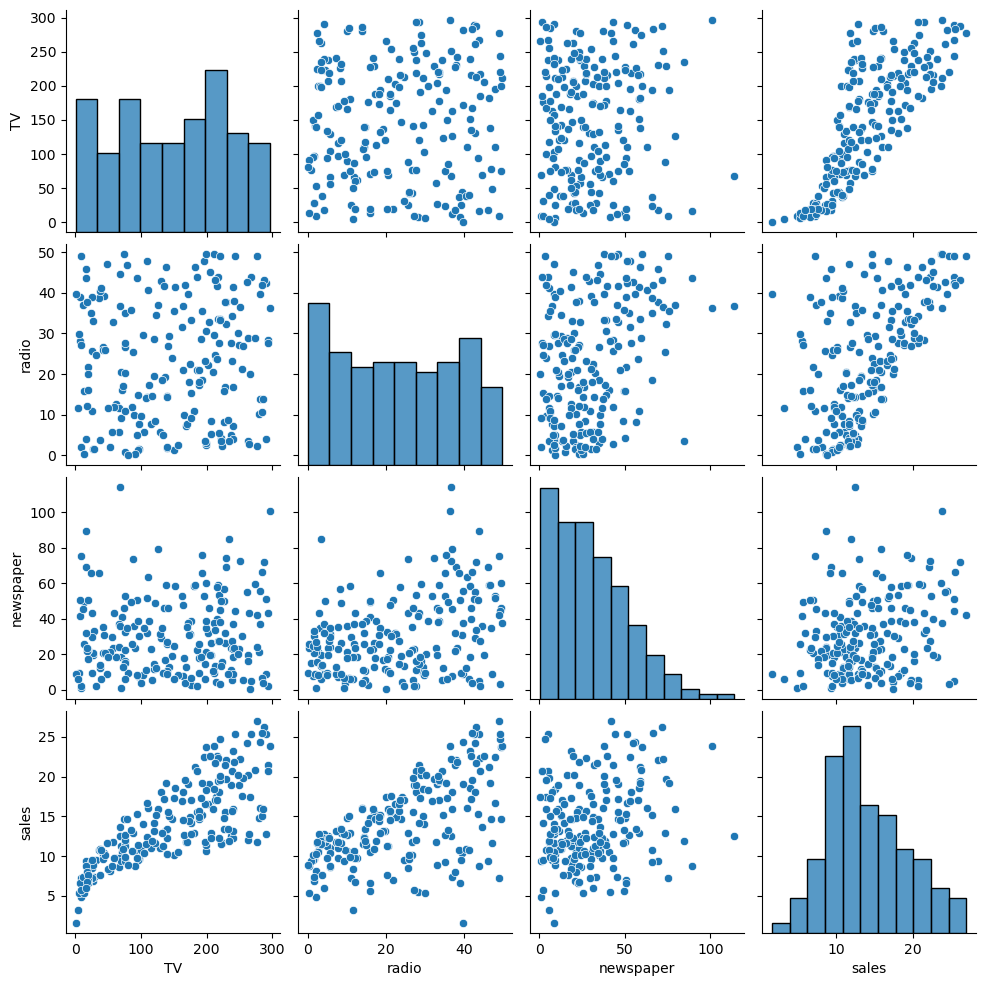

In [7]:
sns.pairplot(df)

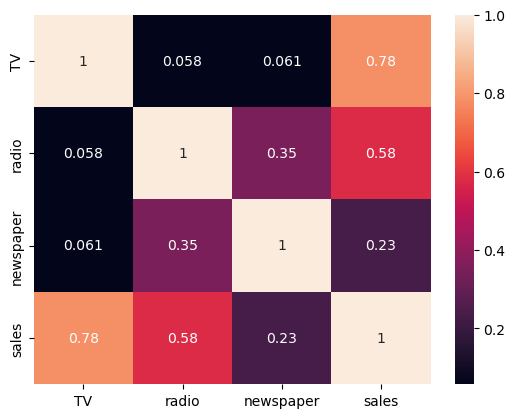

In [6]:
sns.heatmap(data=corr_matrix,annot=True);

#### **Quiz1**: Which feature shows strongest relation with output? **(5 points)** 

TV בגלל שהוא הכי הרבה והוא הכי קרוב לאחד

### Task 4: Multiple Linear Regression - Estimating Coefficients

Estimate linear model : sales as a function of TV,Radio and newspaper (without devision to train and test) and calculate:


#### **Quiz 2:** 
a)  Regression coeficients **(10 points)**

b)  MSE **(5 points)**

c)  R2 and R2 adj **(10 points)**

d)  Get residue plot and answer if data is explained by model and why **(5 points)**

In [8]:
x=df[["TV","radio","newspaper"]]
y=df[["sales"]]
lin_model = linear_model.LinearRegression()
lin_model.fit(x,y)
y_pred = lin_model.predict(x)

Regression coeficients

In [21]:
b0 = lin_model.intercept_
b1 = lin_model.coef_[0][0]
b2 = lin_model.coef_[0][1]
b3 = lin_model.coef_[0][2]
print("b0: ",b0  ,"\nb1: ",b1  ,"\nb2: ",b2,"\nb3: ",b3)

b0:  [2.94055292] 
b1:  0.045670008349111356 
b2:  0.1881206678873485 
b3:  -0.0005663835397696055


MSE

In [22]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred)
print("MSE: ", MSE)

MSE:  2.8109784068866315


R2 R2 adj

In [24]:
R2 = lin_model.score(x,y)
R2_adj = 1-((1-R2)*(len(y)-1)/(len(y)-x.shape[1]-1))
print( "R^2: ",R2,  "\nR^2 adj: ",R2_adj)

R^2:  0.8962192645388727 
R^2 adj:  0.8946307838940595


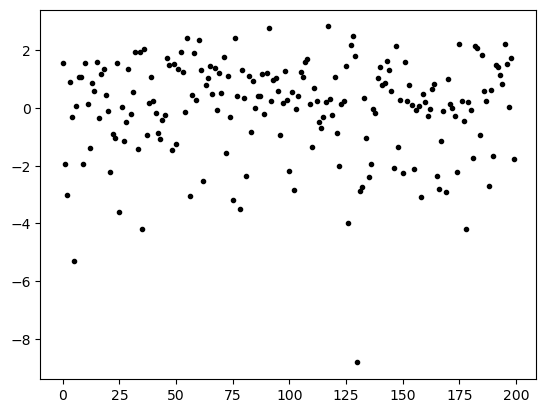

In [25]:
plt.plot(y-y_pred,".k");

that a good model because Because it is very randomly distributed


#### **Quiz 3:** Which feature looks to you less relevant and why **(5 points)**?

newspaper הוא הכי קרוב לאפס בגלל שהוא מאוד נמוך הוא הכי נמוך לכן הוא הכי פחות רלוונטי

#### **Quiz 4**: Remove this less relevant feature build new model and compare to the model above. Is it  
a) better

b) worse

c) almost the same?

**(Choose one answer - 10 points)**  explain why

In [31]:
x_new=df[["TV","radio"]]
y_new=df[["sales"]]
lin_model2 = linear_model.LinearRegression()
lin_model2.fit(x_new,y_new)
y_pred2 = lin_model.predict(x_new)
R2 = lin_model2.score(x_new,y_new)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_new,y_pred2)
print("MSE: ", MSE)
R2

MSE:  2.811110630611814


0.8962143828665656

almost the same Because it doesn't really change the values ​​because it is low and the indicators that determine the quality of the model remain almost the same

#### **Bonus 1**: Add to your latest model another term which is feature1*feature2 and check if this improves the model. It is 
a) better

b) worse

c) almost the same?

**(Choose one answer - 10 points)**  explain why